In [1]:
from pathlib import Path
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

In [2]:
PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]

In [20]:
def get_number_of_files(directory_path: str, file_extension: str) -> int:
    path = os.path.join(directory_path, f'*.{file_extension}')
    return len(glob.glob(path))

def load_yolo_labels(label_path: str) -> list[list[float]]:
    """
    Get labels line by line in a yolo-formatted .txt file
    Args:
        label_path (str): Path of a label file
    Returns:
        A list containing lists of labels
    """
    with open(label_path, "r") as f:
        lines = f.readlines()
    return [list(map(float, line.strip().split())) for line in lines]

def show_bounding_box(image_path: str, label_path: str) -> None:
    """
    Draw bounding boxes on an image and show the image
    Args:
        image_path (str): Path of an image
        label path (str): Path of the corresponding label .txt file. The data must be written in  YOLO format (cls cx cy w h)
    Returns:
        Show the image with all bounding boxes drew on
    """
    labels = load_yolo_labels(label_path) # [cls cx cy w h px1 py1 px2 py2 ...], px py are optional
    coords_bbox = [label[1:5] for label in labels]
    # load the image
    image = Image.open(image_path)
    w, h = image.size
    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(image)
    # Loop to draw bounding boxes
    for coord in coords_bbox:
        cx, cy, bw, bh = coord
        cx, cy, bw, bh = cx*w, cy*h, bw*w, bh*h
        x_corner, y_corner = cx - bw/2, cy - bh/2
        bbox = patches.Rectangle((x_corner, y_corner), bw, bh, edgecolor='r', facecolor='none', linewidth=1)
        print(bbox)
        ax.add_patch(bbox)
    plt.show()

def show_triangle_mask(image_path: str, label_path: str) -> None:
    """
    Draw and show triangle mask on an image
    Args:
        image_path (str): Path of an image
        label path (str): Path of the corresponding label .txt file. The data must be written in  YOLO format (cls x1 y1 x2 y2 x3 y3)
    Returns:
        Show the image with a triangle mask drew on
    """
    labels = load_yolo_labels(label_path) # [cls x1 y1 x2 y2 x3 y3]
    coord_triangle = labels[0][1:7]

    # load the image
    image = Image.open(image_path)
    w, h = image.size
    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(image)
    x1, y1, x2, y2, x3, y3 = coord_triangle
    x1, y1, x2, y2, x3, y3 = x1*w, y1*h, x2*w, y2*h, x3*w, y3*h
    triangle = patches.Polygon(((x1,y1), (x2,y2), (x3,y3)), edgecolor='r', facecolor='none', linewidth=1)
    print(triangle)
    ax.add_patch(triangle)
    plt.show()

In [4]:
# count images and labels in each dataset and in each bee hive

# directory paths
dir_detection = os.path.join(PROJECT_ROOT, 'data', 'full', 'detection')
dir_segment_images = os.path.join(PROJECT_ROOT, 'data', 'full', 'segmentation', 'images')
dir_segment_labels = os.path.join(PROJECT_ROOT, 'data', 'full', 'segmentation', 'labels')
dir_pose_images = os.path.join(PROJECT_ROOT, 'data', 'full', 'pose', 'images')
dir_pose_labels = os.path.join(PROJECT_ROOT, 'data', 'full', 'pose', 'labels')

# count detection data
n_detection_images = 0
n_detection_labels = 0
for hive in os.listdir(dir_detection):
    dir_hive_images = os.path.join(dir_detection, hive, 'images')
    dir_hive_labels = os.path.join(dir_detection, hive, 'labels')
    n_hive_images = get_number_of_files(directory_path=dir_hive_images, file_extension='jpg')
    n_hive_labels = get_number_of_files(directory_path=dir_hive_labels, file_extension='txt')
    n_detection_images += n_hive_images
    n_detection_labels += n_hive_labels
    print('Bee hive', hive)
    print('Number of detection images:', n_hive_images)
    print('Number of detection labels:', n_hive_labels)
    print('='*50)

print('Number of detection images:', n_detection_images)
print('Number of detection labels:', n_detection_labels)
print('='*50)
print('Number of segmentation images:', get_number_of_files(directory_path=dir_segment_images, file_extension='jpg'))
print('Number of segmentation labels:', get_number_of_files(directory_path=dir_segment_labels, file_extension='txt'))
print('='*50)
print('Number of pose images:', get_number_of_files(directory_path=dir_pose_images, file_extension='jpg'))
print('Number of pose labels:', get_number_of_files(directory_path=dir_pose_labels, file_extension='txt'))

Bee hive _bee_20230609e
Number of detection images: 1140
Number of detection labels: 904
Bee hive _bee_20230711b
Number of detection images: 910
Number of detection labels: 857
Bee hive _bee_20230609d
Number of detection images: 720
Number of detection labels: 617
Bee hive _bee_20230609c
Number of detection images: 800
Number of detection labels: 788
Bee hive _bee_20230711c
Number of detection images: 610
Number of detection labels: 515
Bee hive info.txt
Number of detection images: 0
Number of detection labels: 0
Bee hive _bee_20230609a
Number of detection images: 700
Number of detection labels: 700
Bee hive _bee_20230711a
Number of detection images: 1320
Number of detection labels: 1321
Bee hive _bee_20230609b
Number of detection images: 1000
Number of detection labels: 964
Number of detection images: 7200
Number of detection labels: 6666
Number of segmentation images: 2300
Number of segmentation labels: 2300
Number of pose images: 400
Number of pose labels: 400


Rectangle(xy=(502, 442), width=66, height=65.9999, angle=0)
Rectangle(xy=(117.999, 521), width=76.9997, height=51.9998, angle=0)
Rectangle(xy=(1025, 442), width=44.0006, height=68, angle=0)
Rectangle(xy=(793.001, 565), width=39.9994, height=75.9996, angle=0)
Rectangle(xy=(816.001, 349), width=70.9997, height=41, angle=0)


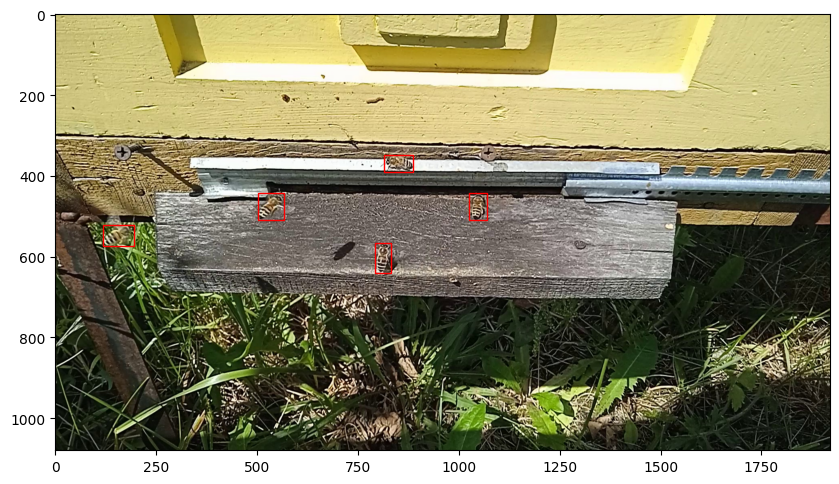

In [13]:
image_path = f'{PROJECT_ROOT}/data/full/detection/_bee_20230609a/images/20230609a48.jpg'
label_path = f'{PROJECT_ROOT}/data/full/detection/_bee_20230609a/labels/20230609a48.txt'
show_bounding_box(image_path, label_path)

Polygon4((39.9237, 7.30153) ...)


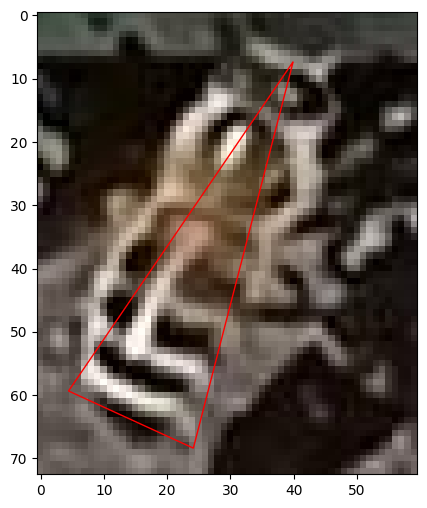

In [21]:
image_path = f'{PROJECT_ROOT}/data/full/segmentation/images/20230609a444_jpg.rf.547cd8316c144e4d9512f44690986a0e.jpg'
label_path = f'{PROJECT_ROOT}/data/full/segmentation/labels/20230609a444_jpg.rf.547cd8316c144e4d9512f44690986a0e.txt'
show_triangle_mask(image_path, label_path)